## 매매 시그널을 만들고 백트레킹하기

- 전략 : 전일 종가가 최근 5일 종가 중 가장 낮고, 이 값이 20일 이동평균보다 낮은 시점만 뽑아서 매수한다. 그리고 마지막 매수 5일 후 전량 종가 매도한다.

# 1. 준비
### (1) 패키지 import

In [23]:
# 패키지 import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ta

### (2) 데이터 불러오기

In [24]:
# 데이터 불러오기
# 삼성전자 일봉 데이터를 사용
# pip install pyarrow

d = pd.read_parquet('../dataset/005930.parquet')

d.head(5)

,timestamp,ticker,open,high,low,close,volume
0,20100104,005930,16060.0,16180.0,16000.0,16180.0,11963550.0
1,20100105,005930,16520.0,16580.0,16300.0,16440.0,27960950.0
2,20100106,005930,16580.0,16820.0,16520.0,16820.0,22987750.0
3,20100107,005930,16820.0,16820.0,16260.0,16260.0,22161850.0
4,20100108,005930,16400.0,16420.0,16120.0,16420.0,14789900.0


### (3) 데이터 준비

In [25]:
# 필요한 데이터 컬럼 생성

# 오늘 포함 과거 5일 종가 중 최고값
d['5d_max'] = d.rolling(5)['close'].max()

# 오늘 포함 과거 5일 종가 중 최저값
d['5d_min'] = d.rolling(5)['close'].min() 

# 전일 종가
d['last_1d_close'] = d['close'].shift(1) 

# 20일 이동평균
d['20d_mean'] = d.rolling(20)['close'].mean() 

d

,timestamp,ticker,open,high,low,close,volume,5d_max,5d_min,last_1d_close,20d_mean
0,20100104,005930,16060.0,16180.0,16000.0,16180.0,11963550.0,NaN,NaN,NaN,NaN
1,20100105,005930,16520.0,16580.0,16300.0,16440.0,27960950.0,NaN,NaN,16180.0,NaN
2,20100106,005930,16580.0,16820.0,16520.0,16820.0,22987750.0,NaN,NaN,16440.0,NaN
3,20100107,005930,16820.0,16820.0,16260.0,16260.0,22161850.0,NaN,NaN,16820.0,NaN
4,20100108,005930,16400.0,16420.0,16120.0,16420.0,14789900.0,16820.0,16180.0,16260.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3529,20240423,005930,76400.0,76800.0,75500.0,75500.0,18717699.0,79600.0,75500.0,76100.0,81480.0
3530,20240424,005930,77500.0,78800.0,77200.0,78600.0,22166150.0,79600.0,75500.0,75500.0,81415.0
3531,20240425,005930,77300.0,77500.0,76300.0,76300.0,15549134.0,78600.0,75500.0,78600.0,81240.0
3532,20240426,005930,77800.0,77900.0,76500.0,76700.0,12755629.0,78600.0,75500.0,76300.0,81035.0


### (4) 매매 시그널 생성

In [26]:
# 종가가 5일 최저가이고, 20일 이동평균보다 낮은 시점만 뽑기
buy = d[(d['close'] == d['5d_min']) & (d['close'] < d['20d_mean'])]

In [27]:
buy

,timestamp,ticker,open,high,low,close,volume,5d_max,5d_min,last_1d_close,20d_mean
19,20100129,005930,16000.0,16020.0,15600.0,15680.0,22864250.0,16840.0,15680.0,16160.0,16402.0
20,20100201,005930,15680.0,15700.0,15300.0,15540.0,25052100.0,16300.0,15540.0,15680.0,16370.0
21,20100202,005930,15800.0,15800.0,15400.0,15440.0,19690150.0,16160.0,15440.0,15540.0,16320.0
24,20100205,005930,15160.0,15220.0,14940.0,15000.0,25751700.0,15540.0,15000.0,15520.0,16148.0
25,20100208,005930,14940.0,15080.0,14820.0,14960.0,21980400.0,15540.0,14960.0,15000.0,16099.0
...,...,...,...,...,...,...,...,...,...,...,...
3524,20240416,005930,81200.0,81300.0,79400.0,80000.0,31949845.0,84100.0,80000.0,82200.0,81400.0
3525,20240417,005930,80700.0,80800.0,78900.0,78900.0,22611631.0,84100.0,78900.0,80000.0,81705.0
3527,20240419,005930,78300.0,78700.0,76300.0,77600.0,31317563.0,82200.0,77600.0,79600.0,81755.0
3528,20240422,005930,77400.0,77500.0,75100.0,76100.0,30469477.0,80000.0,76100.0,77600.0,81615.0


---
# 2. 분석

### (1) 매수 시그널 plotting

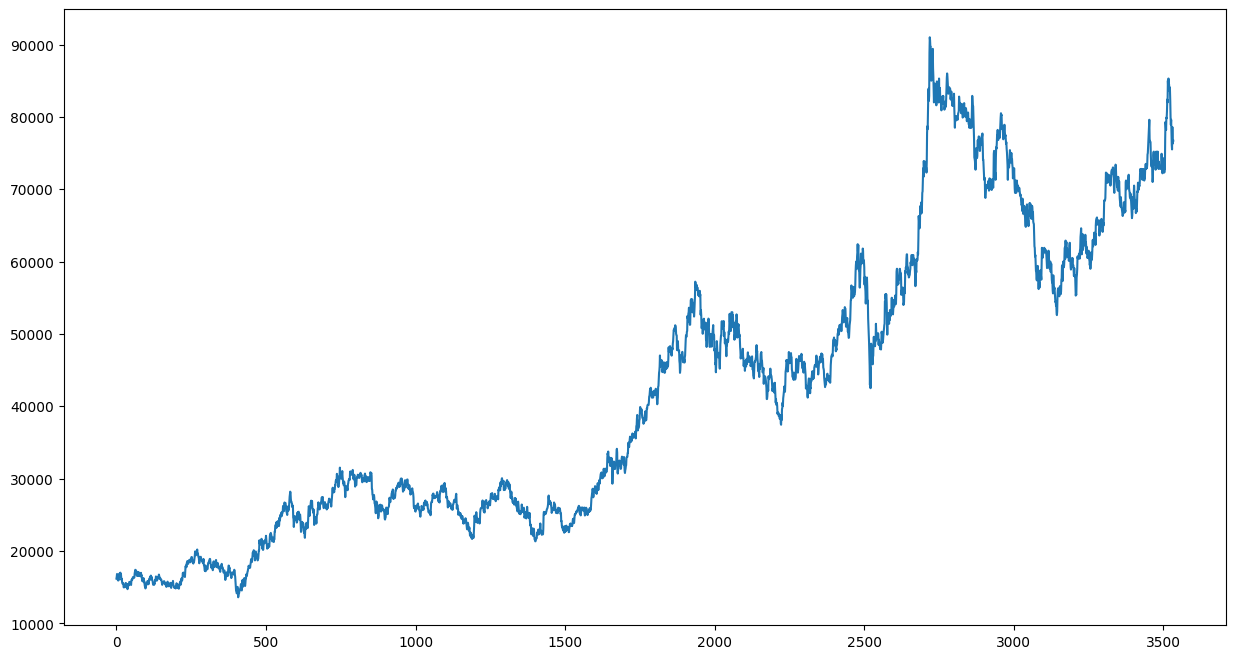

In [28]:
# plt.plot을 활용해 주가 그래프 출력

plt.figure(figsize=(15,8))
plt.plot(d['close'])

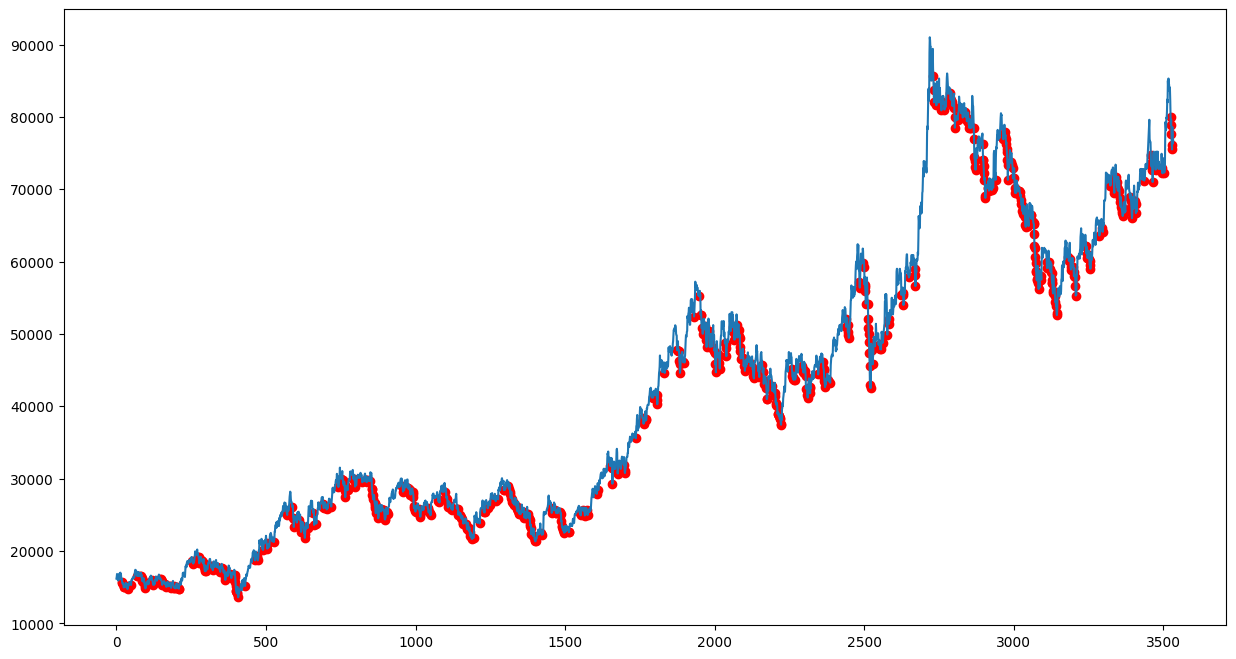

In [29]:
# 주가 그래프에 매수 타점 표시

plt.figure(figsize=(15,8))
plt.plot(d['close'])
plt.scatter(buy.index, buy['close'], c='r')

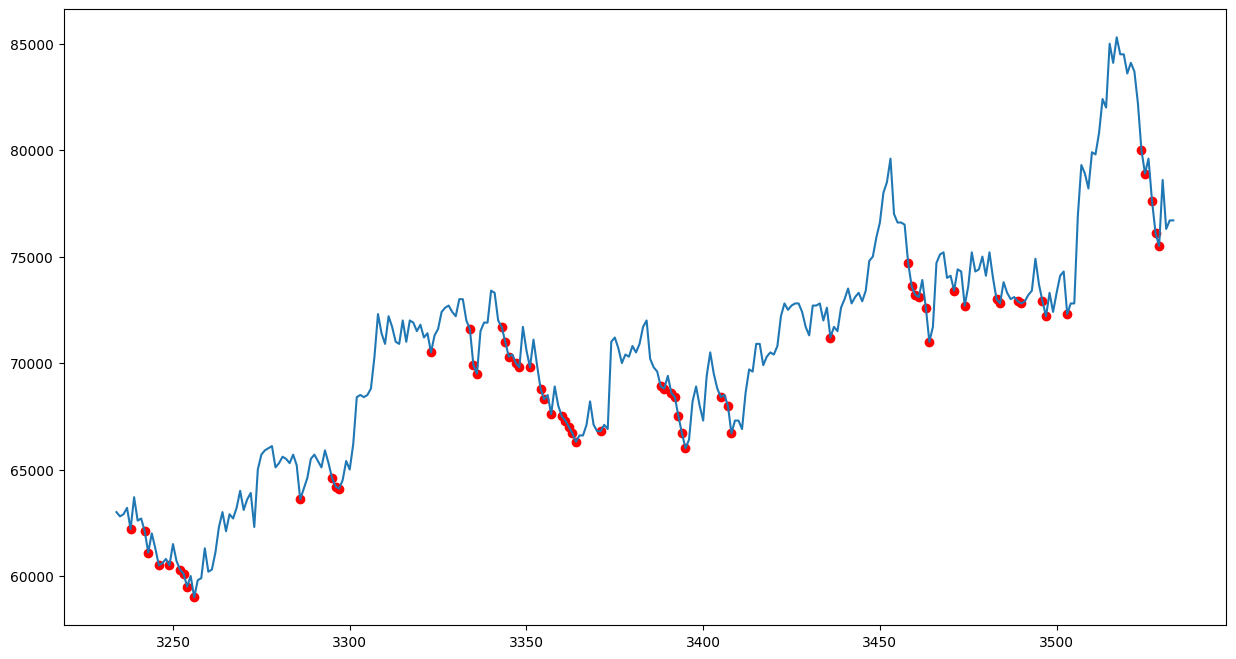

In [30]:
# 최근 300일만 뽑아 매수 타점 표시

d_sample = d.iloc[-300:]
buy_sample = d_sample[(d_sample['close'] == d_sample['5d_min']) & (d_sample['close'] < d_sample['20d_mean'])]

plt.figure(figsize=(15,8))
plt.plot(d_sample['close'])
plt.scatter(buy_sample.index,buy_sample['close'],c='r')

---
# 3. 단일 백테스팅 모델 개발

### (1) 간단한 백테스팅 모델

각 시점의 보유현금/보유종목/수익률을 기록
- 전략: 종가가 20일 평균보다 이하이고 현재 보유 주식 수가 0인 경우에 매수, 그리고 다음날 매도

In [31]:
holding_cash = 1_000_000 # 보유 현금
position = 0 # 현재 보유 주식 수
avg_price = 0 # 보유 주식의 평균 단가
daily_total_value = [] # 일별 총 포트폴리오 가치

for idx,data in d.iterrows(): # 데이터를 과거에서부터 하나씩 접근
    daily_total_value.append(0)

    # 매수 조건을 확인하여 매수
    if data['close'] < data['20d_mean'] and position == 0:
        holding_cash -= 1 * data['close']
        position += 1
        avg_price = data['close']
    # 보유 주식이 이미 있다 = 매수 다음날
    elif position > 0:
        holding_cash += position * data['close']
        position = 0
        avg_price = 0

    # 장마감 후 총 자산을 계산
    daily_total_value[-1] += holding_cash + position * data['close']


In [32]:
daily_total_value

[1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 999860.0,
 999860.0,
 999960.0,
 999960.0,
 999440.0,
 999440.0,
 999700.0,
 999700.0,
 999860.0,
 999860.0,
 999980.0,
 999980.0,
 999900.0,
 999900.0,
 1000160.0,
 1000160.0,
 999860.0,
 999860.0,
 1000020.0,
 1000020.0,
 1000020.0,
 1000020.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000300.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1000960.0,
 1001300.0,
 1001300.0,
 1001300.0,
 1001300.0,
 1001320.0,
 1001320.0,
 1001320.0,
 1001100.0,
 1001100.0,
 1001120.0,
 1001120.0,
 1001120.0,
 1001120.0,
 1001120.0,
 1001220

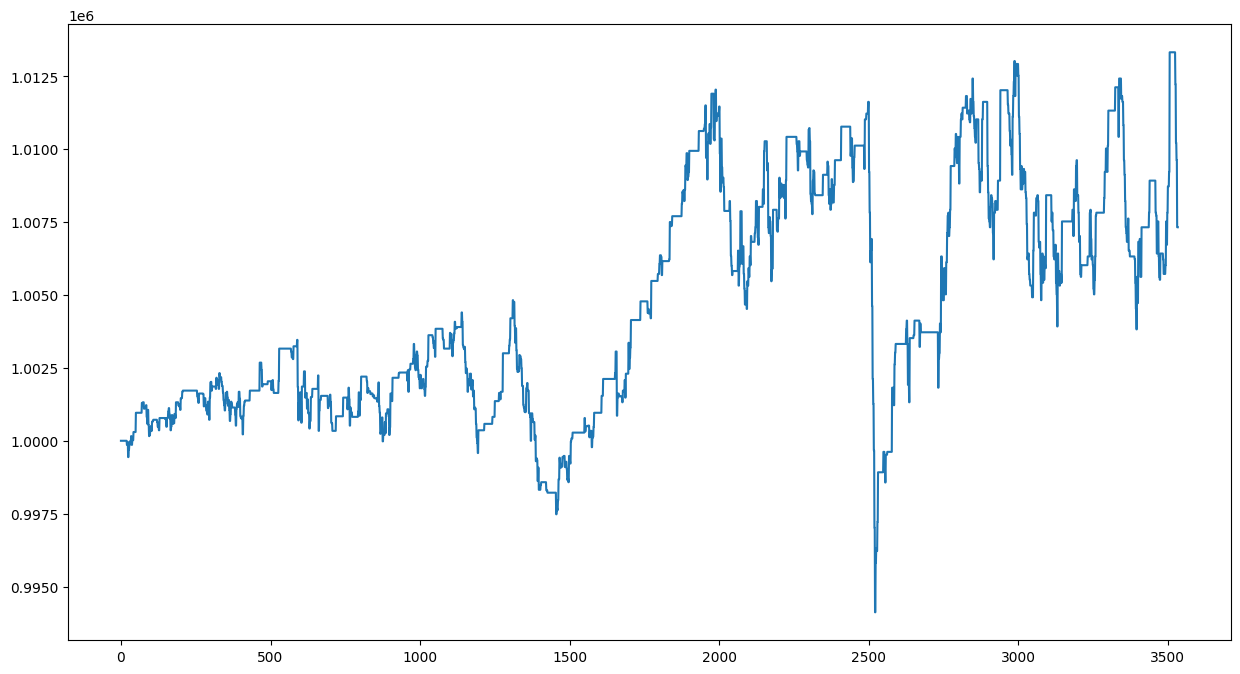

In [33]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value)

### (2) 기본 백테스팅 모델

각 시점의 보유현금/보유종목/수익률을 기록
- 전략
1. 최근 5일 종가 중 당일 종가 가격이 가장 낮고, 20일 이동평균보다 종가가 더 낮은 경우 종가 매수
2. 보유 주식 수는 최대 1개
3. 3일 후 종가에 매도

In [34]:
# 종가가 5일 최저가 & 종가가 20일 이평 아래

# 파라미터 설정
holding_cash = 1_000_000 # 보유 현금
position = 0 # 현재 보유 포지션
avg_price = 0 # 평단가

# 일별 총 포트폴리오 가치
daily_total_value = []

holding_time_passed = 0 # 마지막 매수 후 경과 일수


# for 문으로 하루씩 백테스팅 진행
for idx,data in d.iterrows():
    daily_total_value.append(0)

    # 종가가 5일 종가 중 가장 낮고, 20일 이동평균보다 낮을 때 매수
    if (data['close'] < data['20d_mean']) and (data['close'] == data['5d_min']):
        if holding_cash > 1*data['close'] and position == 0: # 돈이 충분할때
            position += 1
            holding_cash -= 1 * data['close']
            avg_price = data['close']
            holding_time_passed = 0

    # 마지막 매수 3일 후 매도
    if position > 0 and holding_time_passed == 3:
        holding_cash += position * data['close']
        position = 0
        avg_price = 0

    # 오늘의 마무리
    if position > 0:
        holding_time_passed += 1
    
    daily_total_value[-1] = holding_cash + position * data['close']

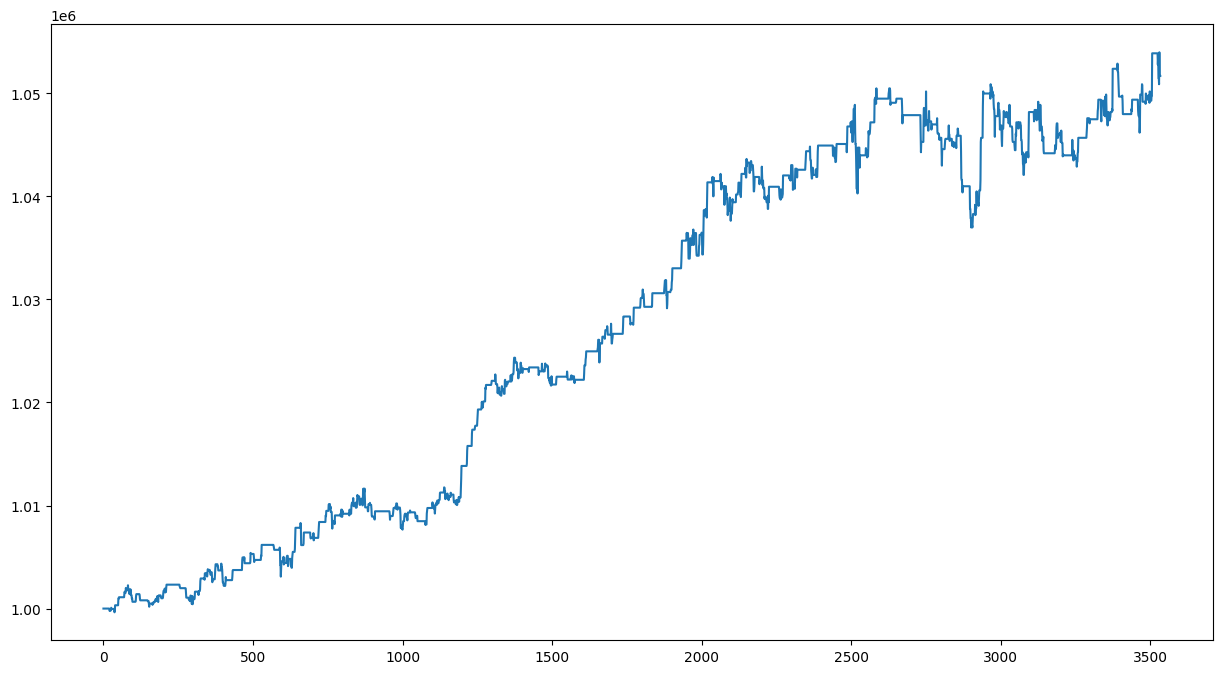

In [35]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value)

return1 = daily_total_value.copy()

### (3) 슬리피지가 들어간 백테스팅 모델

각 시점의 보유현금/보유종목/수익률을 기록
- 전략
1. 최근 5일 종가 중 당일 종가 가격이 가장 낮고, 20일 이동평균보다 종가가 더 낮은 경우 종가 매수
2. 보유 주식 수는 최대 1개
3. 3일 후 종가에 매도
- 슬리피지는 매수, 매도, 매수/매도 중 선택하여 적용 (아래 에제는 매도 시점에서 반영)

In [36]:
# 파라미터 설정
holding_cash = 1_000_000 # 보유 현금
position = 0 # 현재 보유 포지션
avg_price = 0 # 평단가
slippage = 0.004 # 슬리피지

# 일별 총 포트폴리오 가치
daily_total_value = []

holding_time_passed = 0 # 마지막 매수 후 경과 일수

# for 문으로 하루씩 백테스팅 진행
for idx,data in d.iterrows():
    daily_total_value.append(0)

    # 종가가 5일 종가 중 가장 낮고, 20일 이동평균보다 낮을 때 매수
    if (data['close'] < data['20d_mean']) and (data['close'] == data['5d_min']):
        if holding_cash > 1*data['close'] and position ==0:
            position += 1
            holding_cash -= 1 * data['close']
            avg_price = data['close']
            holding_time_passed = 0

    # 마지막 매수 3일 후 매도
    if position > 0 and holding_time_passed == 3:
        holding_cash += position * data['close'] * (1-slippage)
        position = 0
        avg_price = 0

    # 오늘의 마무리
    if position > 0:
        holding_time_passed += 1
    
    daily_total_value[-1] = holding_cash + position * data['close']

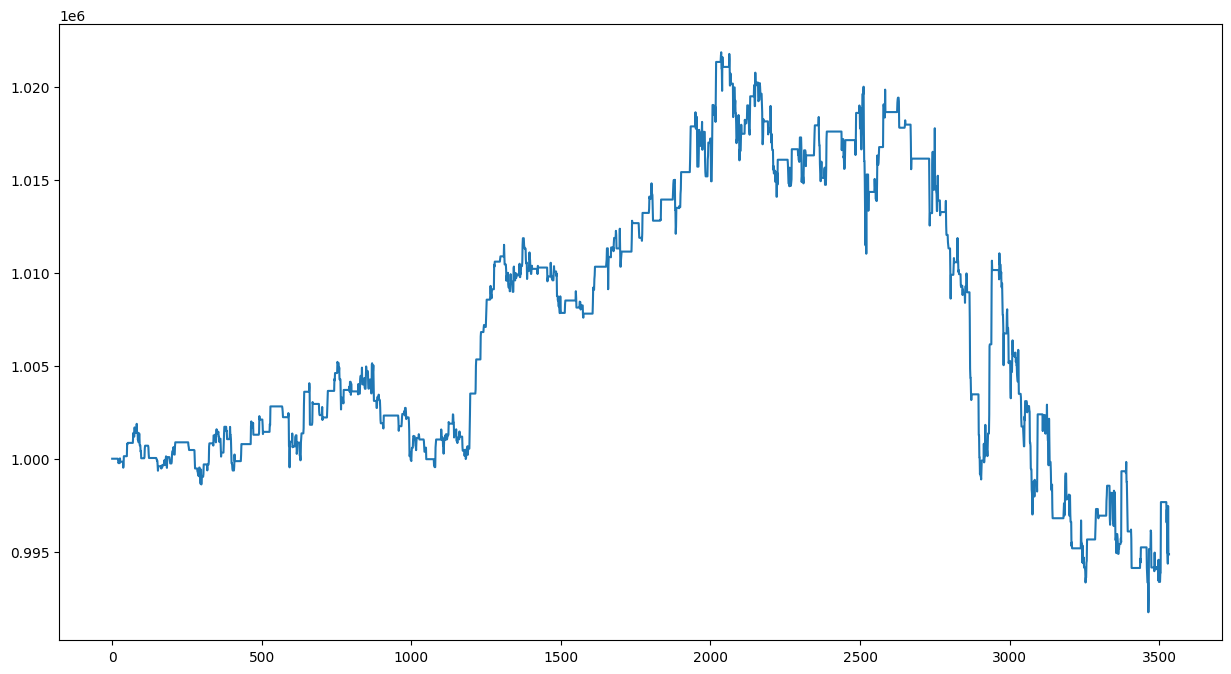

In [37]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value)

return2 = daily_total_value.copy()

## (4) 기본 모델과 슬리피지 포함 모델 비교 

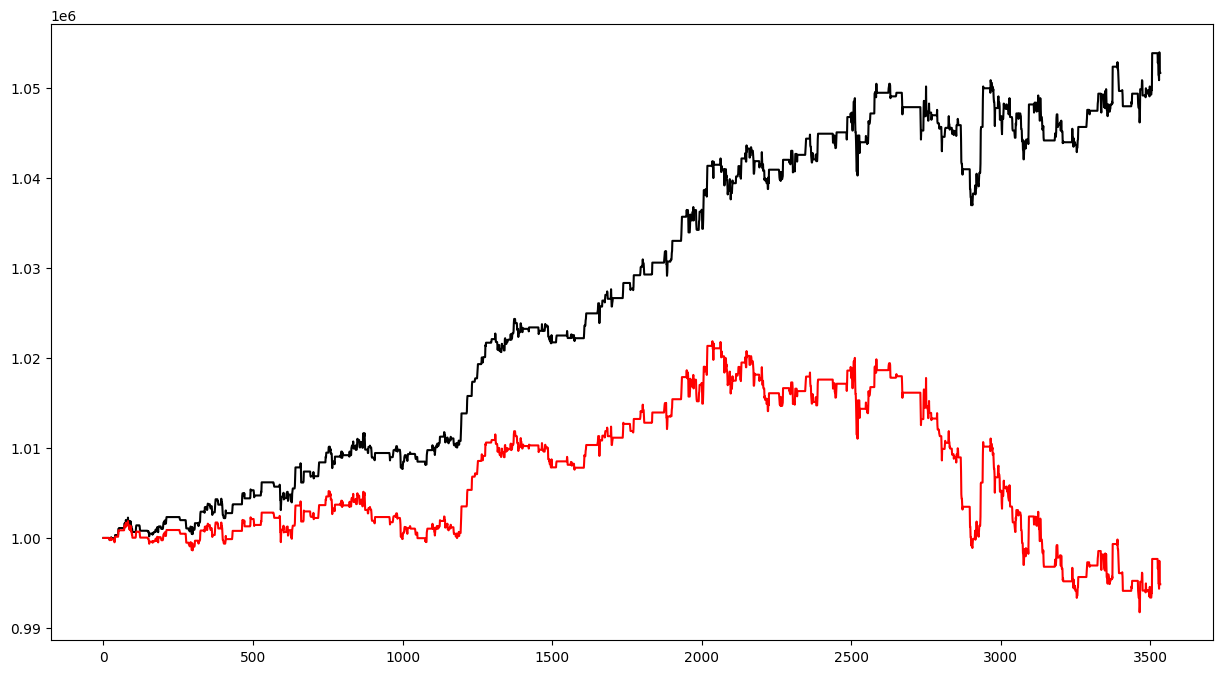

In [38]:
plt.figure(figsize=(15,8))
plt.plot(return1,c='k') # 기본 모델
plt.plot(return2,c='r') # 슬리피지 포함 모델

## (5) 정량적 평가 

총 수익률: -0.51%
------------------------------------------------
총 백테스팅 기간: 14.14년
연 수익률: -0.04%
------------------------------------------------
일 수익률: -0.00%, 일 변동성: 0.00%
Sharpe ratio: -0.06
------------------------------------------------
MDD: -2.95%


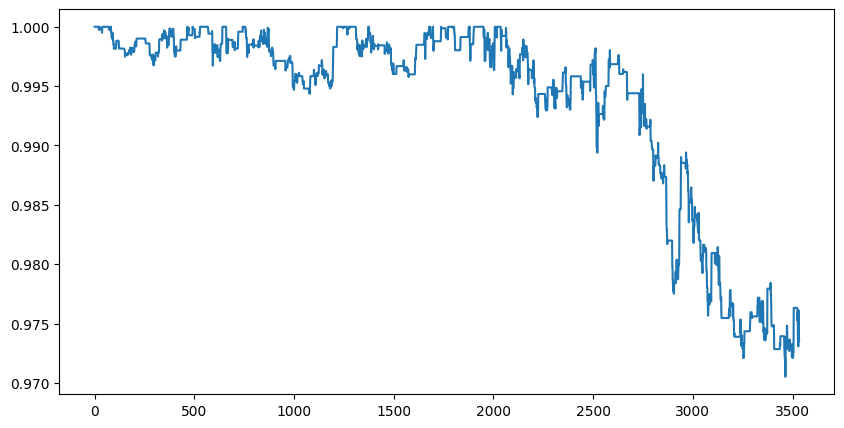

------------------------------------------------


In [39]:
# 전략 총 수익률 계산
total_return_pct = daily_total_value[-1]/daily_total_value[0]
print('총 수익률: {:.2f}%'.format((total_return_pct-1)*100))

print('------------------------------------------------')

# 1년을 250일로 가정, 연 복리 수익률 계산
total_years = len(daily_total_value)/250
print('총 백테스팅 기간: {:.2f}년'.format(total_years))

import math
annaul_return = math.pow(total_return_pct,1/total_years)

print('연 수익률: {:.2f}%'.format((annaul_return-1)*100))

print('------------------------------------------------')

# Sharpe Ratio
daily_return = math.pow(total_return_pct,1/len(daily_total_value)) # 복리
# 단리의 경우
# daily_return = total_return_pct/len(daily_total_value)
daily_std = pd.DataFrame(daily_total_value).pct_change().std()[0]

print('일 수익률: {:.2f}%, 일 변동성: {:.2f}%'.format((daily_return-1)*100,daily_std))
print('Sharpe ratio: {:.2f}'.format(((daily_return-1)/daily_std)*np.sqrt(250)))

print('------------------------------------------------')

# MDD 계산
tv = pd.DataFrame(daily_total_value)
dd = tv/tv.cummax()
print('MDD: {:.2f}%'.format((dd.min()-1)[0]*100))


plt.figure(figsize=(10,5))
plt.plot(dd)
plt.show()

print('------------------------------------------------')


## (6) 벤치마크 적용

총 수익률: 374.04%
------------------------------------------------
총 백테스팅 기간: 14.14년
연 수익률: 11.64%
------------------------------------------------
일 수익률: 0.04%, 일 변동성: 0.02%
Sharpe ratio: 0.42
------------------------------------------------
MDD: -42.20%


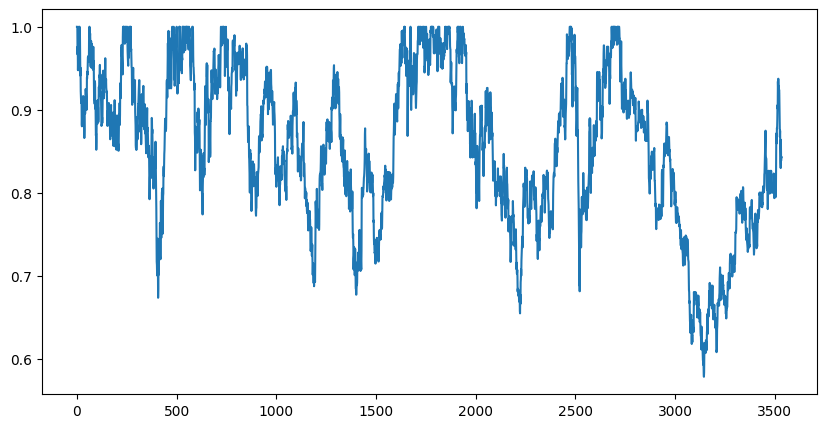

------------------------------------------------


In [40]:
# 삼성전자 Buy & Hold의 수익률 계산

bm_daily_total_value = d['close'].values/d['close'].values[0]

# 전략 총 수익률 계산
total_return_pct = bm_daily_total_value[-1]/bm_daily_total_value[0]
print('총 수익률: {:.2f}%'.format((total_return_pct-1)*100))

print('------------------------------------------------')

# 1년을 250일로 가정, 연 복리 수익률 계산
total_years = len(bm_daily_total_value)/250
print('총 백테스팅 기간: {:.2f}년'.format(total_years))

import math
annaul_return = math.pow(total_return_pct,1/total_years)

print('연 수익률: {:.2f}%'.format((annaul_return-1)*100))

print('------------------------------------------------')

# Sharpe Ratio
daily_return = math.pow(total_return_pct,1/len(bm_daily_total_value))
daily_std = pd.DataFrame(bm_daily_total_value).pct_change().std()[0]

print('일 수익률: {:.2f}%, 일 변동성: {:.2f}%'.format((daily_return-1)*100,daily_std))
# 일수를 년수로 바꿔야 함
print('Sharpe ratio: {:.2f}'.format(((daily_return-1)/daily_std)*np.sqrt(250)))

print('------------------------------------------------')

# MDD 계산
tv = pd.DataFrame(bm_daily_total_value)
dd = tv/tv.cummax() # 지금까지의 누적 최댓값으로 나눔
print('MDD: {:.2f}%'.format((dd.min()-1)[0]*100))


plt.figure(figsize=(10,5))
plt.plot(dd)
plt.show()

print('------------------------------------------------')


## (7) 전략과 벤치마크 비교

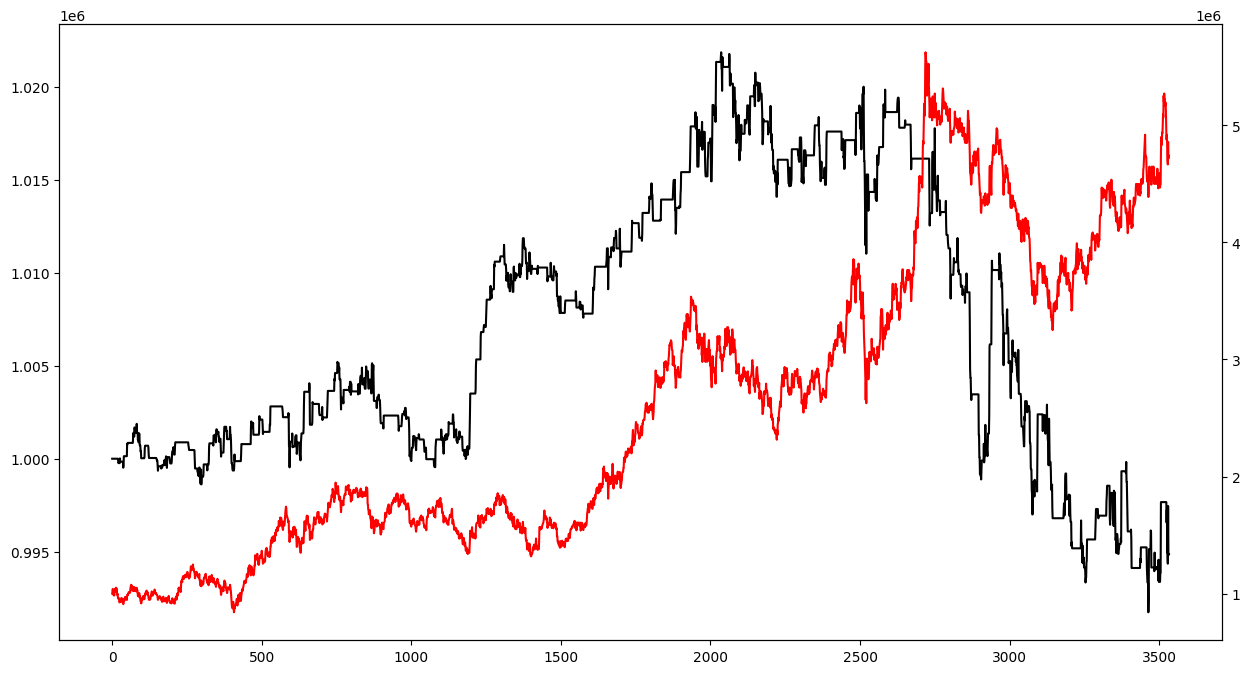

In [41]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value,c='k') # 전략
plt.twinx().plot(bm_daily_total_value*daily_total_value[0],c='r')